In [181]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import os

import matplotlib.pyplot as plt
import numpy as np

In [182]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [183]:
image_size = (128, 128)
transform = transforms.Compose(
    [transforms.Resize(image_size),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [184]:
data_dir = os.path.join(os.getcwd(), 'data')
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

In [185]:
batch_size = 2

In [186]:
#create a trainset from data/train
trainset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
valset = torchvision.datasets.ImageFolder(root=val_dir, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [187]:
#get labels from file "data" and insert them into a list
label = os.listdir(val_dir)
label

['damage', 'whole']

In [188]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

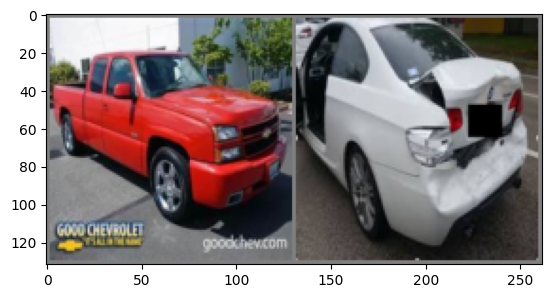

whole damage


In [189]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % label[labels[j]] for j in range(batch_size)))

In [190]:
#create the cnn model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input channel, output channel, kernel size
        self.pool = nn.MaxPool2d(2, 2) #kernel size, stride
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 29 * 29, 120) #input size, output size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2) #output size = number of classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view(-1, 16 * 29 * 29)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #print(x.shape)
        return x
print(Net())

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=13456, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [191]:
net = Net().to(device)

In [192]:
#loss function and optimizer

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [193]:

#train the network
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
print('Finished Training')


[1,   100] loss: 0.692
[1,   200] loss: 0.694
[1,   300] loss: 0.693
[1,   400] loss: 0.687
[1,   500] loss: 0.692
[1,   600] loss: 0.686
[1,   700] loss: 0.677
[1,   800] loss: 0.667
[1,   900] loss: 0.702
[2,   100] loss: 0.664
[2,   200] loss: 0.668
[2,   300] loss: 0.649
[2,   400] loss: 0.637
[2,   500] loss: 0.653
[2,   600] loss: 0.641
[2,   700] loss: 0.637
[2,   800] loss: 0.597
[2,   900] loss: 0.580
[3,   100] loss: 0.588
[3,   200] loss: 0.587
[3,   300] loss: 0.572
[3,   400] loss: 0.553
[3,   500] loss: 0.565
[3,   600] loss: 0.513
[3,   700] loss: 0.607
[3,   800] loss: 0.546
[3,   900] loss: 0.553
[4,   100] loss: 0.401
[4,   200] loss: 0.452
[4,   300] loss: 0.482
[4,   400] loss: 0.491
[4,   500] loss: 0.496
[4,   600] loss: 0.498
[4,   700] loss: 0.474
[4,   800] loss: 0.504
[4,   900] loss: 0.506
[5,   100] loss: 0.418
[5,   200] loss: 0.412
[5,   300] loss: 0.276
[5,   400] loss: 0.387
[5,   500] loss: 0.583
[5,   600] loss: 0.352
[5,   700] loss: 0.366
[5,   800] 

In [205]:
#save the model
PATH = './cnn.pth'
torch.save(net.state_dict(), PATH)

tensor([1, 1])


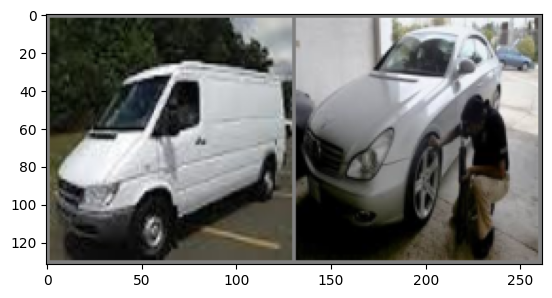

IndexError: too many indices for tensor of dimension 0

In [211]:
#test the model on the validation set
dataiter = iter(valloader)
images, labels = next(dataiter)
print(labels)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % label[labels[j]] for j in range(batch_size)))

In [207]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [208]:
outputs = net(images.to(device))

In [212]:
_, predicted = torch.max(outputs, 1)
print(predicted)
print('Predicted: ', ' '.join('%5s' % label[predicted[j]]
                              for j in range(batch_size)))

tensor([1, 0], device='cuda:0')


IndexError: too many indices for tensor of dimension 0

In [210]:
#train the network
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
print('Finished Training')

Accuracy of the network on the validation images: 75 %


In [200]:
print(label)
labelsss = ['damage', 'whole']

['damage', 'whole']


In [201]:
#accuracy of each label
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in valloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        labelsss[i], 100 * class_correct[i] / class_total[i]))

Accuracy of damage : 79 %
Accuracy of whole : 72 %
